IMPORTING THE DEPENDENCIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data collection and Processing

In [ ]:
loan_dataset=pd.read_csv('/content/bank.csv')
#loan_full_dataset=pd.read_csv('/bank-full.csv')

In [ ]:
print(loan_dataset)
#print(loan_full_dataset)

loan_dataset.shape

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

(4521, 17)

In [ ]:
loan_dataset.head()
#loan_full_dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
loan_dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
#number of missing values in each coloumn\
loan_dataset.isnull().sum()
#loan_full_dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
#label encoding 
# we can assign yes in coloumns as 1 and no as 0
loan_dataset.replace({"y":{'no':0,'yes':1}},inplace=True)

In [ ]:
loan_dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [ ]:
loan_dataset['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [ ]:
loan_dataset['y'].value_counts()

0    4000
1     521
Name: y, dtype: int64

Data visualization

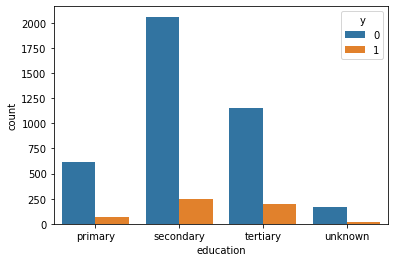

In [ ]:
#education and loan status
sns.countplot(x='education',hue='y',data=loan_dataset)

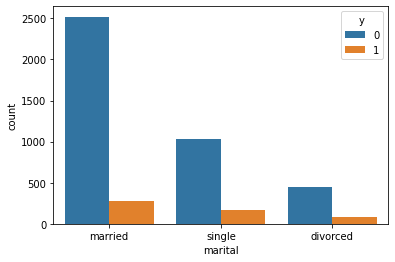

In [ ]:
#age and loan status

sns.countplot(x='marital',hue='y',data=loan_dataset)

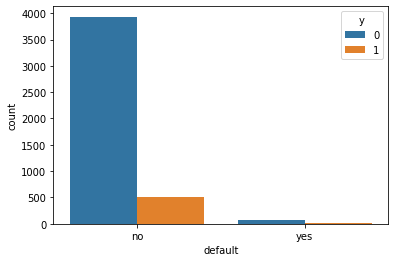

In [ ]:
#default and loan status

sns.countplot(x='default',hue='y',data=loan_dataset)

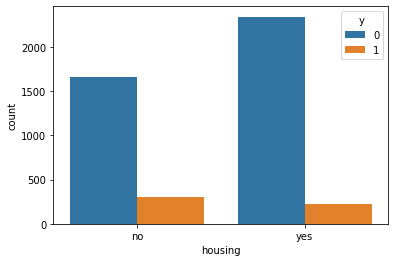

In [ ]:
#housing loan and loan status

sns.countplot(x='housing',hue='y',data=loan_dataset)

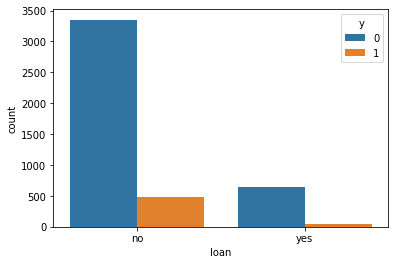

In [ ]:
#personal loan and loan status

sns.countplot(x='loan',hue='y',data=loan_dataset)

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

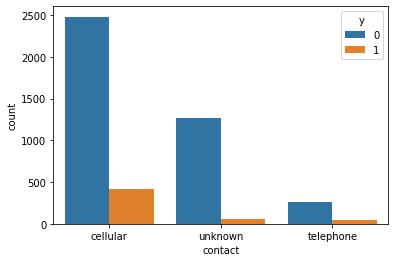

In [ ]:
#contact and loan status

sns.countplot(x='contact',hue='y',data=loan_dataset)
loan_dataset['contact'].value_counts()


unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

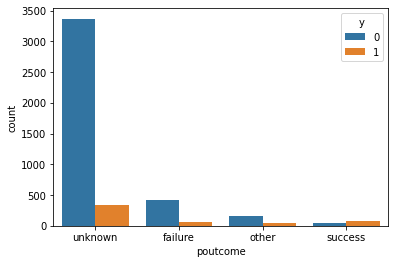

In [ ]:
#poutcome and loan status

sns.countplot(x='poutcome',hue='y',data=loan_dataset)
loan_dataset['poutcome'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

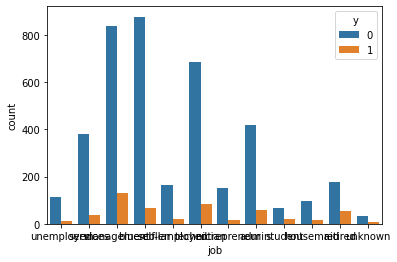

In [ ]:
#job and loan status

sns.countplot(x='job',hue='y',data=loan_dataset)
loan_dataset['job'].value_counts()

converting categorial coloumns into numerical values


In [ ]:
loan_dataset['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [ ]:

loan_dataset.replace({"job":{'admin.':0,'unknown':1,'unemployed':2,'management':3,'housemaid':4,'entrepreneur':5,'student':6,
                                       'blue-collar':7,'self-employed':8,'retired':9,'technician':10,'services':11 }},inplace=True)
loan_dataset['job'].value_counts()


3     969
7     946
10    768
0     478
11    417
9     230
8     183
5     168
2     128
4     112
6      84
1      38
Name: job, dtype: int64

In [ ]:
loan_dataset['marital'].value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [ ]:
loan_dataset.replace({"marital":{'married':0,'divorced':1,'single':2 }},inplace=True)
loan_dataset['marital'].value_counts()

0    2797
2    1196
1     528
Name: marital, dtype: int64

In [ ]:
loan_dataset['education'].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [ ]:
loan_dataset.replace({"education":{'unknown':0,'secondary':1,'primary':2,'tertiary':3 }},inplace=True)
loan_dataset['education'].value_counts()

1    2306
3    1350
2     678
0     187
Name: education, dtype: int64

In [ ]:
loan_dataset['default'].value_counts()

no     4445
yes      76
Name: default, dtype: int64

In [ ]:
loan_dataset.replace({"default":{'no':0,'yes':1 }},inplace=True)
loan_dataset['default'].value_counts()

0    4445
1      76
Name: default, dtype: int64

In [ ]:
loan_dataset['loan'].value_counts()

no     3830
yes     691
Name: loan, dtype: int64

In [ ]:
loan_dataset.replace({"loan":{'no':0,'yes':1 }},inplace=True)
loan_dataset['loan'].value_counts()

0    3830
1     691
Name: loan, dtype: int64

In [ ]:
loan_dataset['contact'].value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

In [ ]:
loan_dataset.replace({"contact":{'unknown':0,'telephone':1,'cellular':2 }},inplace=True)
loan_dataset['contact'].value_counts()

2    2896
0    1324
1     301
Name: contact, dtype: int64

In [ ]:
loan_dataset['month'].value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

In [ ]:
loan_dataset.replace({"month":{'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11 }},inplace=True)
loan_dataset['month'].value_counts()

4     1398
6      706
7      633
5      531
10     389
3      293
1      222
0      148
9       80
8       52
2       49
11      20
Name: month, dtype: int64

In [ ]:
loan_dataset['poutcome'].value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [ ]:
loan_dataset.replace({"poutcome":{'unknown':0,'other':1,'failure':2 ,'success':3}},inplace=True)
loan_dataset['poutcome'].value_counts()

0    3705
2     490
1     197
3     129
Name: poutcome, dtype: int64

In [ ]:
loan_dataset['housing'].value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

In [ ]:
loan_dataset.replace({"housing":{'no':0,'yes':1}},inplace=True)
loan_dataset['housing'].value_counts()

1    2559
0    1962
Name: housing, dtype: int64

In [ ]:
loan_dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,2,0,2,0,1787,0,0,2,19,9,79,1,-1,0,0,0
1,33,11,0,1,0,4789,1,1,2,11,4,220,1,339,4,2,0
2,35,3,2,3,0,1350,1,0,2,16,3,185,1,330,1,2,0
3,30,3,0,3,0,1476,1,1,0,3,5,199,4,-1,0,0,0
4,59,7,0,1,0,0,1,0,0,5,4,226,1,-1,0,0,0


In [ ]:
#seperating the data and label
X=loan_dataset.drop(columns=['y'],axis=1)
Y=loan_dataset['y']
print(X)
print(Y)

      age  job  marital  education  default  balance  housing  loan  contact  \
0      30    2        0          2        0     1787        0     0        2   
1      33   11        0          1        0     4789        1     1        2   
2      35    3        2          3        0     1350        1     0        2   
3      30    3        0          3        0     1476        1     1        0   
4      59    7        0          1        0        0        1     0        0   
...   ...  ...      ...        ...      ...      ...      ...   ...      ...   
4516   33   11        0          1        0     -333        1     0        2   
4517   57    8        0          3        1    -3313        1     1        0   
4518   57   10        0          1        0      295        0     0        2   
4519   28    7        0          1        0     1137        0     0        2   
4520   44    5        2          3        0     1136        1     1        2   

      day  month  duration  campaign  p

Train test split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1,stratify=Y,random_state=2)

Training the model:
Support Vector Machine Model

In [ ]:
classifier=svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [ ]:
X_train_prediction=classifier.predict(X_train)
training_data_accuracy= accuracy_score(X_train_prediction,Y_train)

In [ ]:
print(training_data_accuracy)

0.8858407079646018


In [ ]:
X_test_prediction=classifier.predict(X_test)
testing_data_accuracy= accuracy_score(X_test_prediction,Y_test)
print(testing_data_accuracy)

0.8748341441839894
